Data Preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = load_iris()

X = iris.data
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)
print("Original Data (first 5 rows):\n", df.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
print("\nStandardized Data (first 5 rows):\n", df_scaled.head())


Original Data (first 5 rows):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Standardized Data (first 5 rows):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


K-Mean Clustering

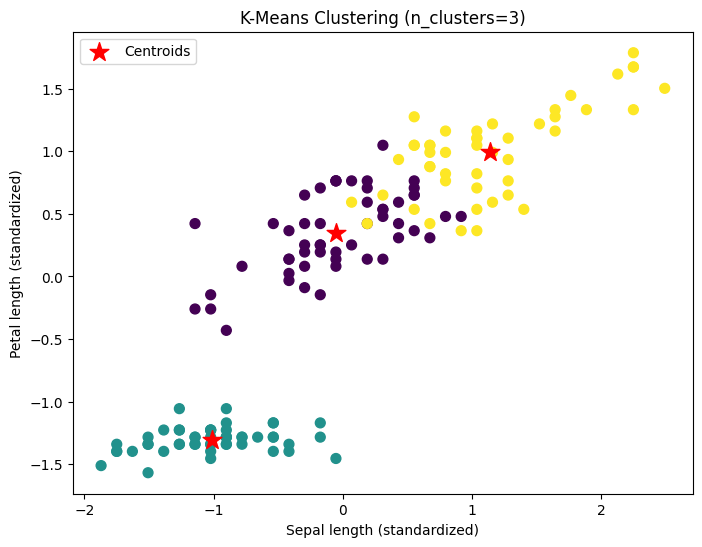

Silhouette Score: 0.460


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
            c='red', marker='*', s=200, label='Centroids')
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Petal length (standardized)')
plt.title('K-Means Clustering (n_clusters=3)')
plt.legend()
plt.show()

sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score of 0.460 means:
The clusters are moderately well-separated.

There is a clear tendency for points to be grouped with their correct cluster, but some overlap between clusters still exists.







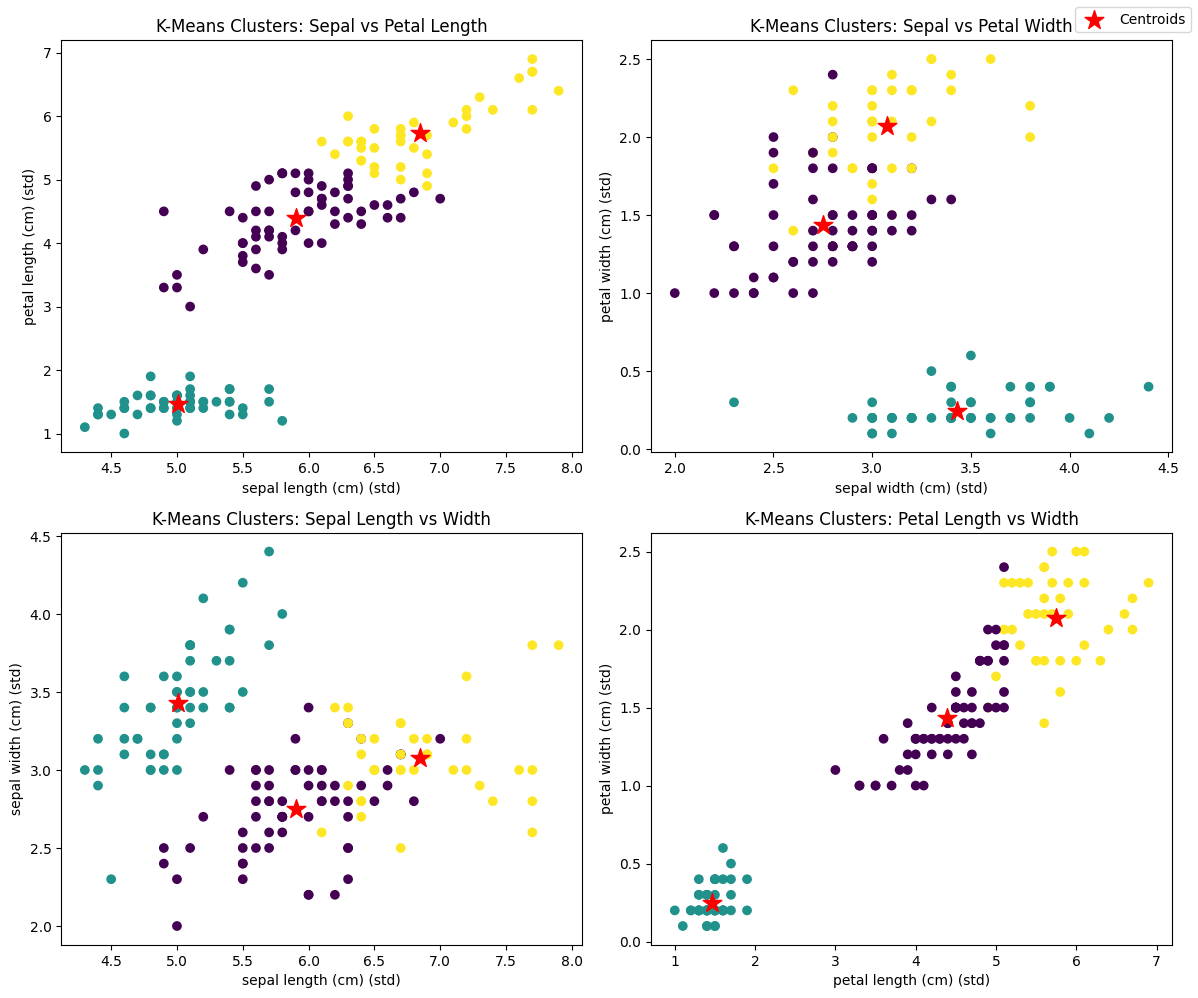

Silhouette Score: 0.553


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
labels_km = kmeans.fit_predict(X)

# Feature pairs and titles
plots = [
    (0, 2, "K-Means Clusters: Sepal vs Petal Length"),
    (1, 3, "K-Means Clusters: Sepal vs Petal Width"),
    (0, 1, "K-Means Clusters: Sepal Length vs Width"),
    (2, 3, "K-Means Clusters: Petal Length vs Width"),
]

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, (i, j, title) in zip(axes.ravel(), plots):
    # scatter plot of points
    ax.scatter(X[:, i], X[:, j], c=labels_km, cmap="viridis")

    # scatter plot of centroids for the same feature pair
    ax.scatter(
        kmeans.cluster_centers_[:, i],
        kmeans.cluster_centers_[:, j],
        c="red", marker="*", s=200, label="Centroids"
    )

    ax.set_xlabel(iris.feature_names[i] + " (std)")
    ax.set_ylabel(iris.feature_names[j] + " (std)")
    ax.set_title(title)

# Add legend only once
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")

plt.tight_layout()
plt.show()

# Global silhouette score
sil_score = silhouette_score(X, labels_km)
print(f"Silhouette Score: {sil_score:.3f}")


Hierarchical Clustering

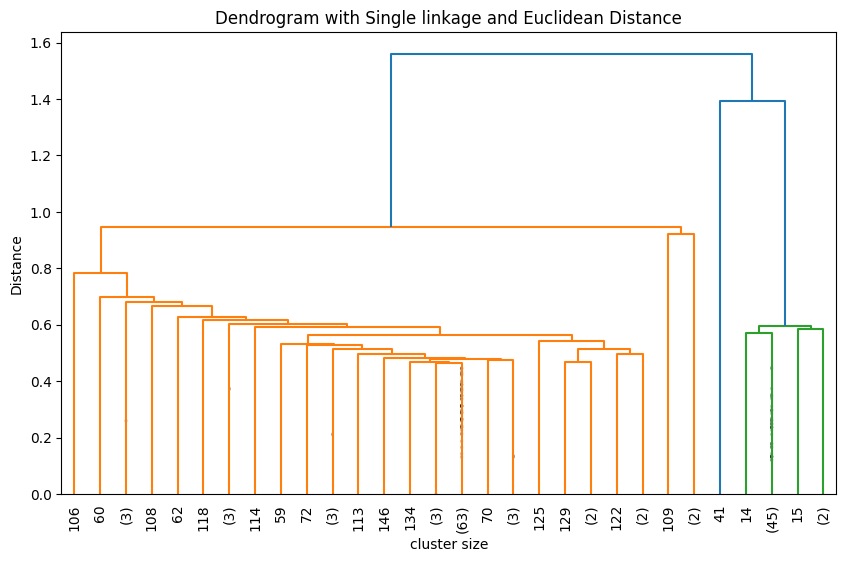

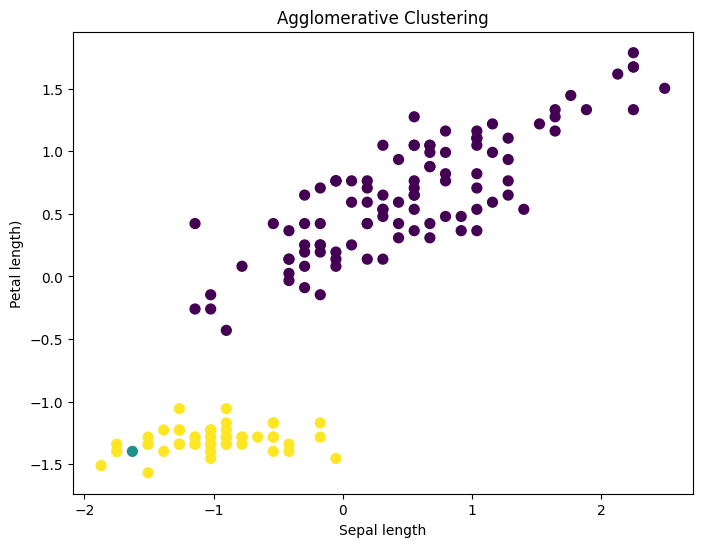

Silhouette Score (Single Linkage, Euclidean): 0.505


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

Z1 = linkage(X_scaled, method='single', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(Z1, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram with Single linkage and Euclidean Distance")
plt.xlabel("cluster size")
plt.ylabel("Distance")
plt.show()

agg_clust = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
agg_labels = agg_clust.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=agg_labels, cmap='viridis', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Petal length)')
plt.title('Agglomerative Clustering')
plt.show()

sil_single_euclidean = silhouette_score(X_scaled, agg_labels)
print(f"Silhouette Score (Single Linkage, Euclidean): {sil_single_euclidean:.3f}")

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

Z2 = linkage(X_scaled, method='complete', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(Z2, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram with Complete linkage and Euclidean Distance")
plt.xlabel("cluster size")
plt.ylabel("Distance")
plt.show()

agg_clust = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='euclidean')
agg_labels = agg_clust.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=agg_labels, cmap='viridis', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Petal length)')
plt.title('Agglomerative Clustering')
plt.show()

sil_complete_euclidean = silhouette_score(X_scaled, agg_labels)
print(f"Silhouette Score (Complete Linkage, Euclidean): {sil_complete_euclidean:.3f}")

In [ ]:
Z3 = linkage(X_scaled, method='average', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(Z3, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram with Average linkage and Euclidean Distance")
plt.xlabel("cluster size")
plt.ylabel("Distance")
plt.show()

agg_clust = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
agg_labels = agg_clust.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=agg_labels, cmap='viridis', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Petal length)')
plt.title('Agglomerative Clustering')
plt.show()

sil_average_euclidean = silhouette_score(X_scaled, agg_labels)
print(f"Silhouette Score (Average Linkage, Euclidean): {sil_average_euclidean:.3f}")

In [ ]:
Z4 = linkage(X_scaled, method='single', metric='cityblock')

plt.figure(figsize=(10, 6))
dendrogram(Z4, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram with Single linkage and cityblock Distance")
plt.xlabel("cluster size")
plt.ylabel("Distance")
plt.show()

agg_clust = AgglomerativeClustering(n_clusters=3, linkage='single', metric='cityblock')
agg_labels = agg_clust.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=agg_labels, cmap='viridis', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Petal length)')
plt.title('Agglomerative Clustering')
plt.show()

sil_single_cityblock = silhouette_score(X_scaled, agg_labels)
print(f"Silhouette Score (Single Linkage, cityblock): {sil_single_cityblock:.3f}")

In [ ]:
Z5 = linkage(X_scaled, method='complete', metric='cityblock')

plt.figure(figsize=(10, 6))
dendrogram(Z5, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram with Complete linkage and cityblock Distance")
plt.xlabel("cluster size")
plt.ylabel("Distance")
plt.show()

agg_clust = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='cityblock')
agg_labels = agg_clust.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=agg_labels, cmap='viridis', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Petal length)')
plt.title('Agglomerative Clustering')
plt.show()

sil_complete_cityblock = silhouette_score(X_scaled, agg_labels)
print(f"Silhouette Score (Complete Linkage, cityblock): {sil_complete_cityblock:.3f}")

In [ ]:
Z6 = linkage(X_scaled, method='average', metric='cityblock')

plt.figure(figsize=(10, 6))
dendrogram(Z6, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram with average linkage and cityblock Distance")
plt.xlabel("cluster size")
plt.ylabel("Distance")
plt.show()

agg_clust = AgglomerativeClustering(n_clusters=3, linkage='average', metric='cityblock')
agg_labels = agg_clust.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=agg_labels, cmap='viridis', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Petal length)')
plt.title('Agglomerative Clustering')
plt.show()

sil_average_cityblock = silhouette_score(X_scaled, agg_labels)
print(f"Silhouette Score (average Linkage, cityblock): {sil_average_cityblock:.3f}")

In [ ]:
Z7 = linkage(X_scaled, method='single', metric='minkowski')

plt.figure(figsize=(10, 6))
dendrogram(Z7, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram with Single linkage and Minkowski Distance")
plt.xlabel("cluster size")
plt.ylabel("Distance")
plt.show()

agg_clust = AgglomerativeClustering(n_clusters=3, linkage='single', metric='minkowski')
agg_labels = agg_clust.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=agg_labels, cmap='viridis', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Petal length)')
plt.title('Agglomerative Clustering')
plt.show()

sil_single_minkowshi = silhouette_score(X_scaled, agg_labels)
print(f"Silhouette Score (Single Linkage, Minkowski): {sil_single_minkowshi:.3f}")

In [ ]:
Z8 = linkage(X_scaled, method='complete', metric='minkowski')

plt.figure(figsize=(10, 6))
dendrogram(Z8, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram with Complete linkage and minkowski Distance")
plt.xlabel("cluster size")
plt.ylabel("Distance")
plt.show()

agg_clust = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='minkowski')
agg_labels = agg_clust.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=agg_labels, cmap='viridis', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Petal length)')
plt.title('Agglomerative Clustering')
plt.show()

sil_complete_minkowski = silhouette_score(X_scaled, agg_labels)
print(f"Silhouette Score (Complete Linkage, minkowski): {sil_complete_minkowski:.3f}")

In [ ]:
Z9 = linkage(X_scaled, method='average', metric='minkowski')

plt.figure(figsize=(10, 6))
dendrogram(Z6, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram with average linkage and minkowski Distance")
plt.xlabel("cluster size")
plt.ylabel("Distance")
plt.show()

agg_clust = AgglomerativeClustering(n_clusters=3, linkage='average', metric='minkowski')
agg_labels = agg_clust.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=agg_labels, cmap='viridis', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Petal length)')
plt.title('Agglomerative Clustering')
plt.show()

sil_average_minkowski = silhouette_score(X_scaled, agg_labels)
print(f"Silhouette Score (average Linkage, minkowski): {sil_average_minkowski:.3f}")